## 190031065
## Mohammad Tarique Anjum

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("kerala.csv")
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SUBDIVISION       118 non-null    object 
 1   YEAR              118 non-null    int64  
 2   JAN               118 non-null    float64
 3   FEB               118 non-null    float64
 4   MAR               118 non-null    float64
 5   APR               118 non-null    float64
 6   MAY               118 non-null    float64
 7   JUN               118 non-null    float64
 8   JUL               118 non-null    float64
 9   AUG               118 non-null    float64
 10  SEP               118 non-null    float64
 11  OCT               118 non-null    float64
 12  NOV               118 non-null    float64
 13  DEC               118 non-null    float64
 14   ANNUAL RAINFALL  118 non-null    float64
 15  FLOODS            118 non-null    object 
dtypes: float64(13), int64(1), object(2)
memory u

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,118.0,1959.500000,34.207699,1901.0,1930.250,1959.50,1988.750,2018.0
JAN,118.0,12.218644,15.473766,0.0,2.175,5.80,18.175,83.5
FEB,118.0,15.633898,16.406290,0.0,4.700,8.35,21.400,79.0
MAR,118.0,36.670339,30.063862,0.1,18.100,28.40,49.825,217.2
APR,118.0,110.330508,44.633452,13.1,74.350,110.40,136.450,238.0
MAY,118.0,228.644915,147.548778,53.4,125.050,184.60,264.875,738.8
JUN,118.0,651.617797,186.181363,196.8,535.550,625.60,786.975,1098.2
JUL,118.0,698.220339,228.988966,167.5,533.200,691.65,832.425,1526.5
AUG,118.0,430.369492,181.980463,178.6,316.725,386.25,500.100,1398.9
SEP,118.0,246.207627,121.901131,41.3,155.425,223.55,334.500,526.7


array([[<AxesSubplot:title={'center':'MAR'}>,
        <AxesSubplot:title={'center':'APR'}>],
       [<AxesSubplot:title={'center':'MAY'}>,
        <AxesSubplot:title={'center':'JUN'}>]], dtype=object)

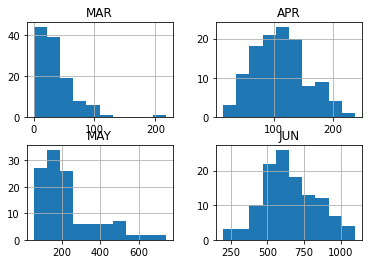

In [5]:
hist1 = df[['MAR','APR','MAY','JUN']]
hist1.hist()

#### Changing the target column to numeric values

In [7]:
df["JUN_GT_500"] = (df["JUN"] > 500).astype("int")
df["JUL_GT_500"] = (df["JUL"] > 500).astype("int")
df_small = df.loc[:, ["YEAR", "JUN_GT_500", "JUL_GT_500", "FLOODS"]]
df_small["COUNT"] = 1
df_small.head()

,YEAR,JUN_GT_500,JUL_GT_500,FLOODS,COUNT
0,1901,1,1,YES,1
1,1902,0,1,YES,1
2,1903,1,1,YES,1
3,1904,1,1,YES,1
4,1905,1,1,NO,1


In [8]:
df_small.shape

(118, 5)

In [9]:
df["FLOODS"] = df["FLOODS"].map({"YES": 1, "NO": 0})

In [10]:
pd.crosstab(df['FLOODS'],df['JUN_GT_500'])

JUN_GT_500,0,1
FLOODS,,
0,19,39
1,6,54


#### Creating the tabular data based on the counts

In [11]:
pd.crosstab(df_small["FLOODS"], df_small["JUN_GT_500"])

JUN_GT_500,0,1
FLOODS,,
NO,19,39
YES,6,54


In [12]:
P_F = (6 + 54) / (6 + 54 + 19 + 39)
P_J = (39 + 54) / (6 + 54 + 19 + 39)
P_F_intersect_J = 54 / (6 + 54 + 19 + 39)
print(f"P(F): {P_F}") 
print(f"P(J): {P_J}")
print(f"P(F AND J): {P_F_intersect_J}")

P(F): 0.5084745762711864
P(J): 0.788135593220339
P(F AND J): 0.4576271186440678


#### Now calculate probailitity of flood given it rained more than 500 mm in June (P(A|B))

In [13]:
P_F_J = P_F_intersect_J / P_J
print(f"P(F|J): {P_F_J}")

P(F|J): 0.5806451612903226


#### Probability of rain more than 500 mm in June given it flooded that year (P(B|A))

In [14]:
P_J_F = (P_F_J * P_J) / P_F
print(f"P(J|F): {P_J_F}")

P(J|F): 0.9000000000000001


In [15]:
# We can similarly do it for july
pd.crosstab(df_small["FLOODS"], df_small["JUL_GT_500"])

JUL_GT_500,0,1
FLOODS,,
NO,19,39
YES,3,57


In [16]:
P_F = (3 + 57) / (3 + 57 + 19 + 39)
P_J = (39 + 57) / (3 + 57 + 19 + 39)
P_F_intersect_J = 57 / (3 + 57 + 19 + 39)
print(f"P(F): {P_F}") 
print(f"P(J): {P_J}")
print(f"P(F AND J): {P_F_intersect_J}")

P(F): 0.5084745762711864
P(J): 0.8135593220338984
P(F AND J): 0.4830508474576271


#### Now calculate probailitity of flood given it rained more than 500 mm in July

In [17]:
P_F_J = P_F_intersect_J / P_J
print(f"P(F|J): {P_F_J}")

P(F|J): 0.59375


#### Probability of rain more than 500 mm in July given it flooded that year (P(B|A))

In [18]:
P_J_F = (P_F_J * P_J) / P_F
print(f"P(J|F): {P_J_F}")

P(J|F): 0.9500000000000002
